In [77]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('retail_sales_dataset.csv')

In [78]:
data.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Sales
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


In [79]:
# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns


In [80]:
# Fill missing numerical values with the median
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing categorical values with the mode
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


In [81]:
# Convert date columns to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [82]:
import os 
# Ensure 'data/processed' directory exists or create it
output_dir = 'data/processed'
os.makedirs(output_dir, exist_ok=True)

# Save cleaned data
data.to_csv(os.path.join(output_dir, 'cleaned_retail_sales.csv'), index=False)

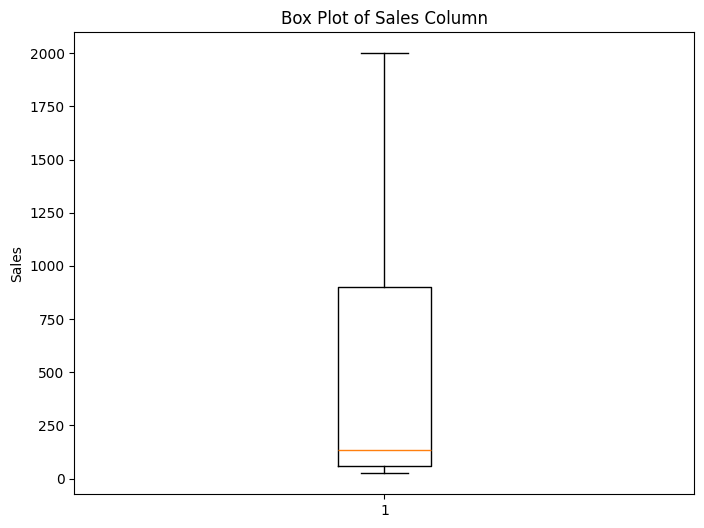

In [83]:
import matplotlib.pyplot as plt

# Visualize the distribution using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data['Sales'])
plt.title('Box Plot of Sales Column')
plt.ylabel('Sales')
plt.show()

In [84]:
# Handle outliers (example for sales column)
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]


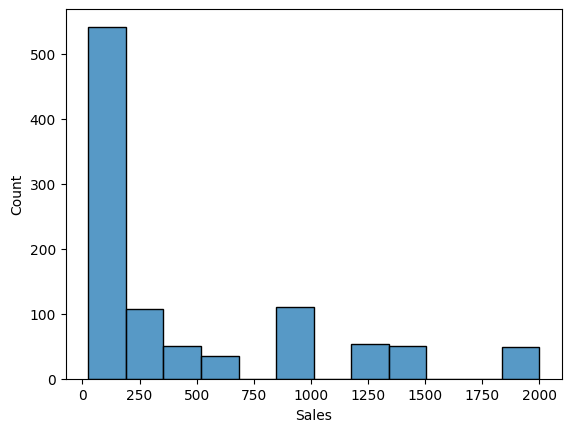

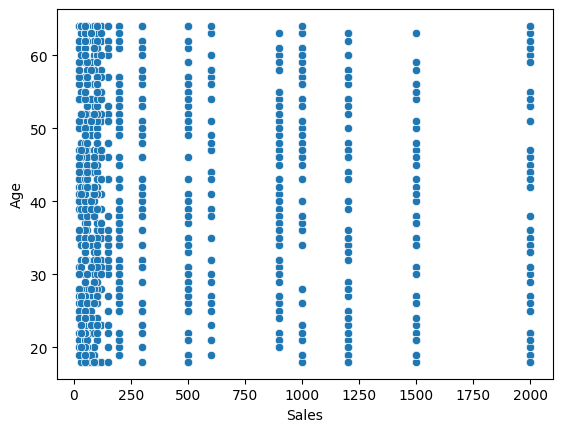

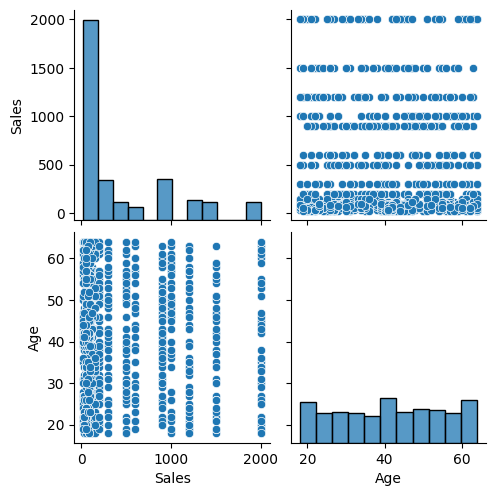

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis
sns.histplot(data['Sales'])
plt.show()

# Bivariate analysis
sns.scatterplot(x='Sales', y='Age', data=data)
plt.show()

# Multivariate analysis
sns.pairplot(data[['Sales', 'Age', 'Product Category']])
plt.show()


In [86]:
# Type cast the 'Customer ID' column to string
data['Customer ID'] = data['Customer ID'].astype(str)


In [87]:
# Type cast the 'Gender' column to string
data['Gender'] = data['Gender'].astype(str)


In [88]:
# Type cast the 'Gender' and 'Product Category' columns to string
data['Gender'] = data['Gender'].astype(str)
data['Product Category'] = data['Product Category'].astype(str)


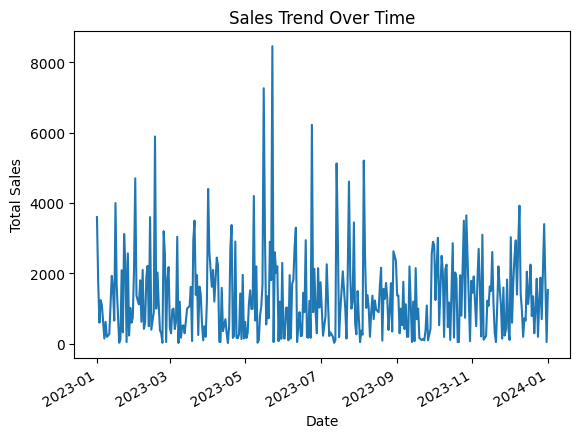

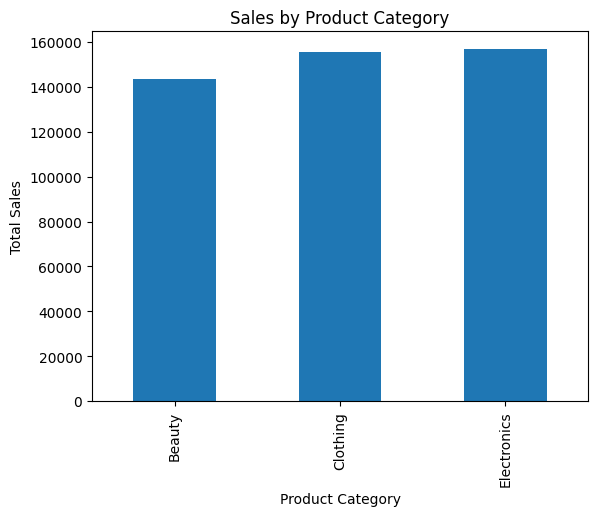

ValueError: could not convert string to float: 'Beauty'

In [89]:
# Plotting numerical data
numeric_cols = ['Sales', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']

# One-hot encode 'Gender' and 'Product Category' columns
data_encoded = pd.get_dummies(data, columns=['Gender', 'Product Category'])

# Time series plot
data.groupby('Date')['Sales'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.show()

# Bar plot
data.groupby('Product Category')['Sales'].sum().plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales by Product Category')
plt.show()

# Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
